# Import and plot all the fit parameters vs temperature

In [1]:
%run functions_for_ESR_data_processing.ipynb
%matplotlib inline

compound = 'Na'

if compound == 'Li':
    folder = "C:\\Users\\F25_1.307_b\\Box Sync\\Klingeler_Masterarbeit\\howardevansite\\LiCuFe2(VO4)3 powder\\X-band\\21_02_2019"
else:
    folder = "C:\\Users\\F25_1.307_b\\Box Sync\\Klingeler_Masterarbeit\\howardevansite\\NaCuFe2(VO4)3 powder\\X-band\\19_02_2019"
    
filename = folder+'\\python fits\\python_fit_results_single_Lor_phase_mixing.txt'




# list of the names of all the files in "folder" 
# files with different endings (.DTA, .dat, DSC, ...) all only appear once
files = [i[:-4] for i in os.listdir(folder) if i[-3:] == 'dat']

# extracts the temperature from the filename
# argument is just name of the file
def temperature (name):
    start = name.find('_')
    end = name.find('K')
    
    temp = name[start+1:end]
    if temp.find('p') == -1:
        temp_new = temp
    else:
        middle = temp.find('p')
        temp_new = temp[:middle] + '.' + temp[middle+1:]
    temp_new = str("%.1f" % float(temp_new))
    return temp_new+' K'
    

# extracts the freqeuncy from the .DSC file
# argument needs to be filename of .DSC file (icluding full path and .DSC ending)
def frequency (filename):
    f = open (filename, 'r')
    for line in f:
        if line[0:9] == 'Frequency':
            line = line.strip()
            line = line.split()
            frequency = line[1] + ' ' + line[2]
    return frequency


# none of the following important for any of the following procedure but makes it easier accessing individual files

# this routine sorts the filenames in "files" according to their temperatures
# and gives an array "temperatures" with the ordered temperatures
temperatures = []
for name in files:
    temp_new = temperature(name)[:-2]    
    temperatures.append(float(temp_new))

temperatures = np.array(temperatures)
files = np.array(files)

files = files[temperatures.argsort()]
temperatures = sorted(temperatures)




if compound == 'Li':
    #T, B01, dB01, gamma1, dgamma1, A1, dA1, B02, dB02, gamma2, dgamma2, A2, dA2, l, dl, m, dm, n, dn, freq = data_import(filename, 3)
    T, B01, dB01, gamma1, dgamma1, A1, dA1, l, dl, m, dm, n, dn, freq, mixing_angle, dangle = data_import(filename, 3)
else:
    #T, B01, dB01, gamma1, dgamma1, A1, dA1, B02, dB02, gamma2, dgamma2, A2, dA2, B03, dB03, gamma3, dgamma3, A3, dA3, l, dl, m, dm, n, dn, freq = data_import(filename, 3)
    T, B01, dB01, gamma1, dgamma1, A1, dA1, l, dl, m, dm, n, dn, freq, mixing_angle, dangle = data_import(filename, 3)


Tone, B0, dB0, gamma, dgamma, A, dA, l0, dl0, m0, dm0, n0, dn0, freq0 = data_import(folder+'\\python fits\\initialguess.txt', 3)



# Plot of the fit parameters as a fct of temperature

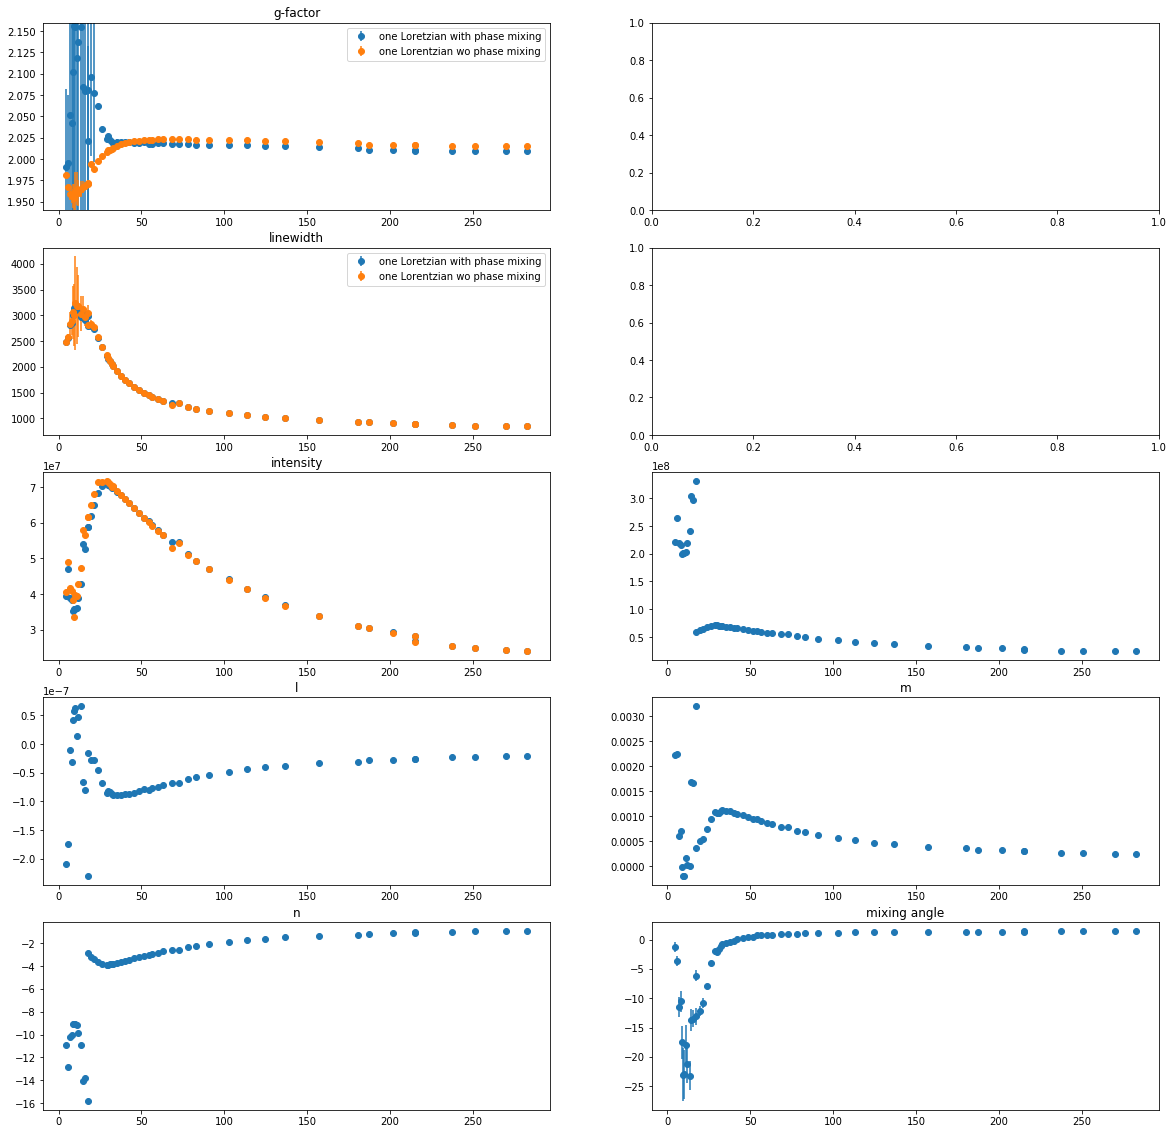

In [18]:
###################################################################################################
###################################################################################################
lower_limit = 0
upper_limit = 300

# do you only want to show temperatures in the range between lower and upper limit?: cut 'no'
# do you want to show all temperatures except the ones between lower and upper limit?: cut = 'yes'
cut = 'no'
###################################################################################################
###################################################################################################


if cut == 'no':
    mask = [all( [(lower_limit<T)[i], (T<upper_limit)[i]] ) for i in np.arange(len(T)) ]
elif cut == 'yes': 
    mask = [any( [(lower_limit>T)[i], (T>upper_limit)[i]] ) for i in np.arange(len(T)) ]
else:
    raise Exception('The only two possible options for "cut" are "yes" or "no"! You entered: "{}"'.format(cut))

#mask = n>-25

fig, axes = plt.subplots(5, 2, sharex=False, sharey=False, figsize=(20,20))

g1, g_err1 = [10000*freq/B01/13.98, 10000*freq*dB01/B01/B01/13.98]
#g2, g_err2 = [10000*freq/B02/13.98, 10000*freq*dB02/B02/B02/13.98]
g, g_err = [10000*freq0/B0/13.98, 10000*freq0*dB0/B0/B0/13.98]

axes[0,0].set_title('g-factor')
axes[0,0].errorbar(T[mask], g1[mask], yerr=g_err1[mask], fmt = 'o')
#axes[0,0].errorbar([T[index]], [g1[index]], fmt = 'o')
axes[0,0].errorbar(Tone[mask], g[mask], yerr = g_err[mask], fmt='o')
#axes[0,0].legend(['L1', 'one Lorentzian'])
axes[0,0].legend(['one Loretzian with phase mixing', 'one Lorentzian wo phase mixing'])
axes[0,0].set_ylim(1.94,2.16)

#axes[0,1].errorbar(T[mask], g2[mask], fmt = 'o')
#axes[0,1].errorbar([T[index]], [g2[index]], fmt = 'o')




data1 = np.array([gamma1, dgamma1])
#data2 = np.array([gamma2, dgamma2])
data3 = np.array([gamma, dgamma])

axes[1,0].set_title('linewidth')
axes[1,0].errorbar(T[mask], data1[0, mask], yerr = dgamma1[mask], fmt='o')
#axes[1,0].errorbar([T[index]], [data1[0,index]], fmt = 'o')
axes[1,0].errorbar(T[mask], data3[0, mask], yerr = data3[1, mask], fmt='o')
#axes[1,0].legend(['L1', 'one Lorentzian'])
axes[1,0].legend(['one Loretzian with phase mixing', 'one Lorentzian wo phase mixing'])

#axes[1,1].errorbar(T[mask], data2[0, mask], fmt='o')
#axes[1,1].errorbar([T[index]], [data2[0,index]], fmt = 'o')

#axes[1].legend(['1st peak', '2nd peak', '3rd peak', 'single Lorentzian'])




data1, err1 = rescale_A( A1, dA1, compound )
#data2, err2 = rescale_A_Na( A2, dA2 )
data3, err3 = rescale_A( A, dA, compound )


axes[2,0].set_title('intensity')
#axes[2,0].set_title('intensity; ' + str(A1[13]/A1[14]) + '    ' + str(A2[13]/A2[14]))
axes[2,0].errorbar(T[mask], data1[mask], yerr=err1[mask], fmt='o')
#axes[2,0].errorbar(T[mask], data2[mask], fmt='o')
axes[2,0].errorbar(T[mask], data3[mask], fmt='o')
#axes[2,0].errorbar([T[index]], [data1[index]], fmt = 'o')
#axes[2,0].errorbar([T[index]], [data2[index]], fmt = 'o')
#axes[2,0].legend(['L1', 'L2', 'one Lorentzian'])
axes[0,0].legend(['one Loretzian with phase mixing', 'one Lorentzian wo phase mixing'])

#axes[2,1].set_title('intensity; ' + str(A1[34]/A1[35]) + '    ' + str(A2[34]/A2[35]))
axes[2,1].errorbar(T[mask], A1[mask], yerr = dA1[mask], fmt='o')
#axes[2,1].errorbar(T[mask], A2[mask], yerr = dA2[mask], fmt='o')
#axes[2,1].errorbar([T[index]], [A1[index]], fmt = 'o')
#axes[2,1].errorbar([T[index]], [A2[index]], fmt = 'o')
#axes[2].legend(['1st peak', '2nd peak', '3rd peak', 'single Lorentzian'])



axes[3,0].set_title('l')
axes[3,0].errorbar(T[mask], l[mask], yerr = dl[mask], fmt='o')

axes[3,1].set_title('m')
axes[3,1].errorbar(T[mask], m[mask], yerr = dm[mask], fmt='o')

axes[4,0].set_title('n')
axes[4,0].errorbar(T[mask], n[mask], yerr = dn[mask], fmt='o')

axes[4,1].set_title('mixing angle')
axes[4,1].errorbar(T[mask], mixing_angle[mask], yerr = np.sqrt(dangle[mask]), fmt='o')


#data1, err1 = rescale_A_Na( A3, dA3 )
#data1, err1 = np.array([10000*freq/B03/13.98, 10000*freq*dB03/B03/B03/13.98])
#data1, err1 = np.array([A3, dA3])
#data1, err1 = np.array([gamma3, dgamma3])
#axes[4,1].errorbar(T[mask], data1[mask], yerr = err1[mask], fmt='o')

plt.show()

In [11]:
print(T[13], T[14], T[34], T[35])

13.3 13.3 68.6 68.6


In [21]:
print(T[12], T[13])

17.5 17.5


In [22]:
A1[12]/A1[13]

5.625227545407753

T = 4.5 K
file = NaCuFe2_4p5K
l = -2.0895337793763397e-07
m = 0.00221802476281228
n = -10.88643566897393


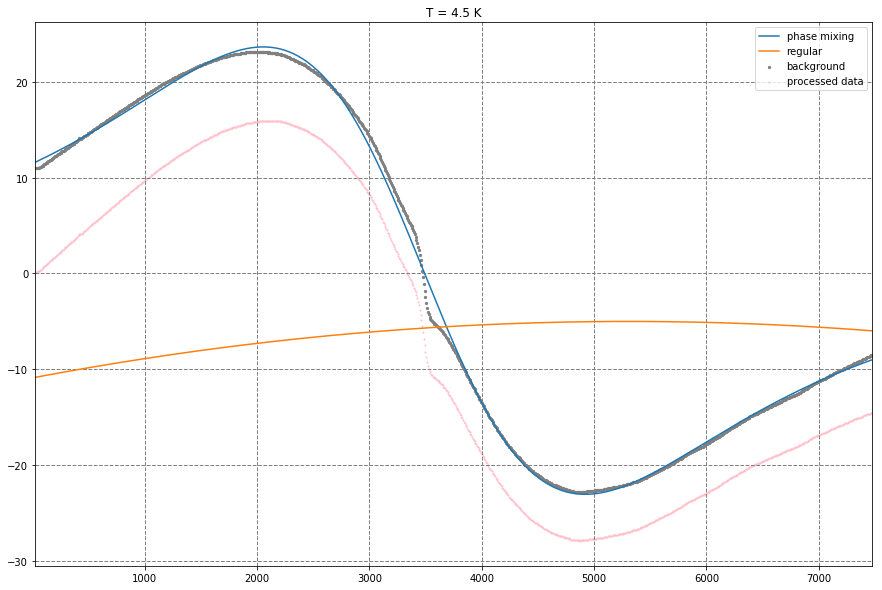

In [30]:
temp = 2
index = np.arange(len(Tone))[ (abs(Tone-temp)-min(abs(Tone-temp))) < 0.01 ][0]
#index = 13


field, amp = data_import(folder+'\\'+files[index]+'_processed.txt', 3)

d_phase_mixing = one_Lor_derivative_w_phase(field, B01[index], A1[index], gamma1[index], mixing_angle[index])
d_single = one_Lor(field, B0[index], A[index], gamma[index])
b = (l[index]*field*field+m[index]*field+n[index])

data_minus_b = amp-b


fig, axes = plt.subplots(1, 1, figsize=(15,10))

axes.plot(field, d_phase_mixing)
#axes.plot(field, d_single)
axes.plot(field, l[index]*field**2+m[index]*field+n[index])
axes.scatter(field, data_minus_b, s=5, c = 'gray')
axes.scatter(field, amp, s=1, c = 'pink')

axes.grid(color='gray', linestyle='--', linewidth=1)
axes.legend(['phase mixing', 'regular', 'background', 'processed data', 'raw data'])
axes.set_title('T = '+str(T[index])+' K')
axes.set_xlim([min(field), max(field)])

print ('T = '+str(T[index])+' K\nfile = '+files[index] + '\nl = '+str(l[index]) + 
       '\nm = '+str(m[index]) + '\nn = '+str(n[index]))



data = [field/10000, data_minus_b, d_phase_mixing, amp, b]        
names = ['B', 'X-ESR signal', 'fit', 'raw data', 'background']
units = ['T', 'a.u.', 'a.u.', 'a.u.', 'a.u.']
comments = [str(freq0[index])+' GHz, '+str(T[index])+' K, '+str(mixing_angle[index])+'°', 'Exp', 'fit', 'raw data', 'background']
    
#save(data, names, units, comments, folder+'\\individual_fit_curves\\single_Lorentzian_w_phase_mixing\\individual_fit_curves_'+str(T[index])+'_K.txt' )

# Look at the individual fits of fitting one Lorentzian

<ErrorbarContainer object of 3 artists>

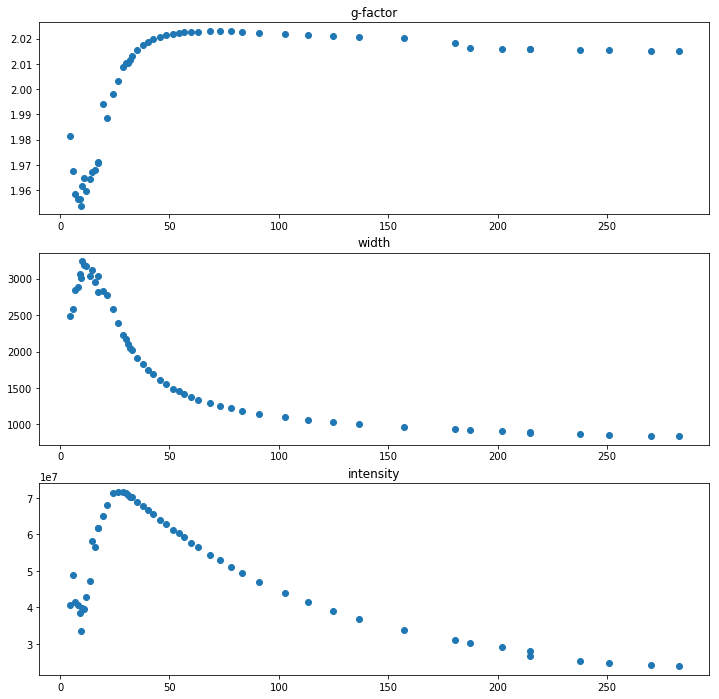

In [49]:
lower_limit = 0
upper_limit = 300
mask = [all( [ (lower_limit<Tone[i]), (Tone[i]<upper_limit) ] ) for i in np.arange(len(Tone)) ]


fig, axes = plt.subplots(3, 1, sharex=False, sharey=False, figsize=(12,12))

g, g_err = [10000*freq0/B0/13.98, 10000*freq0*dB0/B0/B0/13.98]

axes[0].set_title('g-factor')
axes[0].errorbar(Tone[mask], g[mask], fmt='o')


axes[1].set_title('width')
axes[1].errorbar(Tone[mask], gamma[mask], fmt='o')

data3, err3 = rescale_A_Na( A, dA )
axes[2].set_title('intensity')
axes[2].errorbar(Tone[mask], data3[mask], fmt='o')

T = 10.1 K
file = LiCuFeVO3_10p1K
l = -5.015490907537544e-08
m = 0.0010443482187533137
n = -8.186204093228906


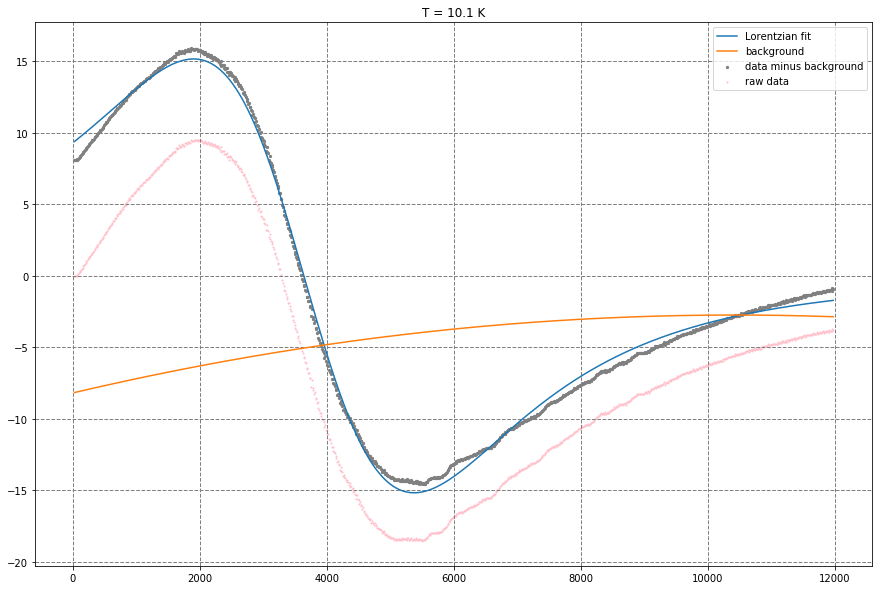

In [7]:
temp = 10
index = np.arange(len(Tone))[ (abs(Tone-temp)-min(abs(Tone-temp))) < 0.01 ][0]
#index = 35

field, amp = data_import(folder+'\\'+files[index]+'_processed.txt', 3)


d1 = one_Lor(field, B0[index], A[index], gamma[index])

data_minus_b = amp-(l0[index]*field*field+m0[index]*field+n0[index])

fig, axes = plt.subplots(1, 1, figsize=(15,10))


axes.plot(field, d1)
axes.plot(field, l0[index]*field**2+m0[index]*field+n0[index])
axes.scatter(field, data_minus_b, s=5, c = 'gray')
axes.scatter(field, amp, s=1, c = 'pink')
axes.grid(color='gray', linestyle='--', linewidth=1)

axes.legend(['Lorentzian fit', 'background', 'data minus background', 'raw data'])
axes.set_title('T = '+str(T[index])+' K')

print ('T = '+str(T[index])+' K\nfile = '+files[index] + '\nl = '+str(l[index]) + 
       '\nm = '+str(m[index]) + '\nn = '+str(n[index]))

#data = [field/10000, raw_data, d1]        
names = ['field', 'raw data', 'fit 1']
units = ['T', '', '']
comments = [str(T[index])+' K', str(T[index])+' K', str(T[index])+' K', str(T[index])+' K', str(T[index])+' K']

#save(data, names, units, comments, folder+'\\individual_fit_curves\\individual_fit_curves_'+str(T[index])+'_K.txt' )

Text(0.5,1,'T = 68.6 K')

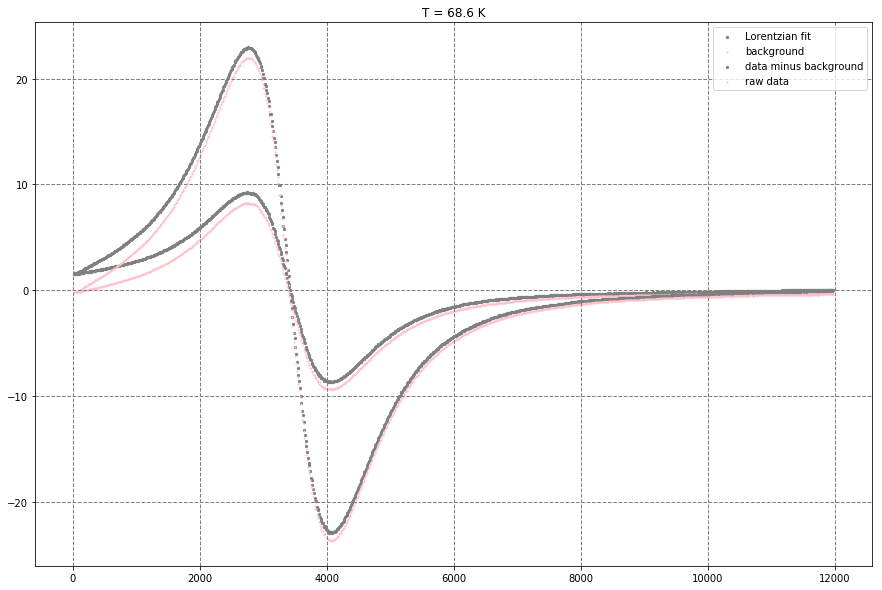

In [28]:
fig, axes = plt.subplots(1, 1, figsize=(15,10))

field, amp = data_import(folder+'\\'+files[34]+'_processed.txt', 3)
T, B0one, dB0, gammaone, dgamma, Aone, dA, l0, dl0, m0, dm0, n0, dn0, freq0 = data_import(folder+'\\python fits\\initialguess.txt', 3)
data_minus_b = amp-(l0[index]*field*field+m0[index]*field+n0[index])
axes.scatter(field, data_minus_b, s=5, c = 'gray')
axes.scatter(field, amp, s=1, c = 'pink')

field, amp = data_import(folder+'\\'+files[35]+'_processed.txt', 3)
T, B0one, dB0, gammaone, dgamma, Aone, dA, l0, dl0, m0, dm0, n0, dn0, freq0 = data_import(folder+'\\python fits\\initialguess.txt', 3)
data_minus_b = amp-(l0[index]*field*field+m0[index]*field+n0[index])
axes.scatter(field, data_minus_b, s=5, c = 'gray')
axes.scatter(field, amp, s=1, c = 'pink')


axes
axes.grid(color='gray', linestyle='--', linewidth=1)

axes.legend(['Lorentzian fit', 'background', 'data minus background', 'raw data'])
axes.set_title('T = '+str(T[index])+' K')